In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import numpy as np
import re

In [2]:
table = pd.read_csv(r'D:\Datasets\Golf\table.csv',index_col=0)
down_the_line_view = table.query('view =="down-the-line"')['id']
root = pathlib.Path(r'D:\Datasets\Golf\Images\Address')

image_paths = list(root.joinpath(str(i)).with_suffix('.jpg') for i in down_the_line_view)

In [3]:
hog = cv2.HOGDescriptor((64,128),(16,16),(8,8),(8,8),9)
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

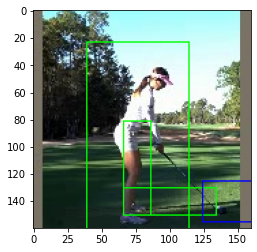

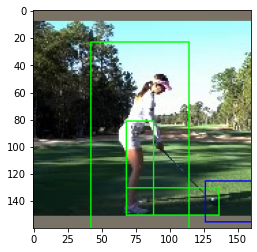

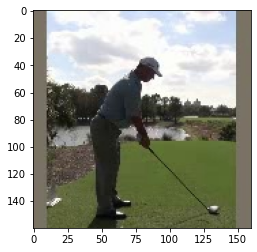

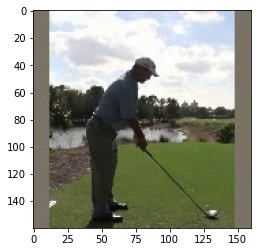

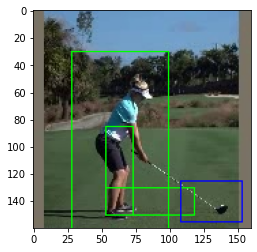

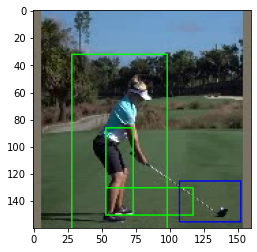

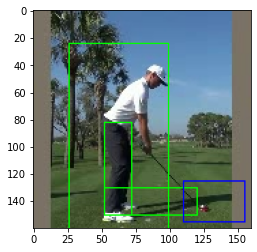

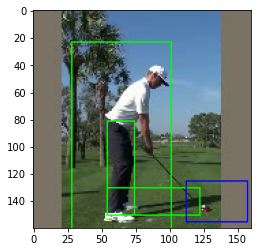

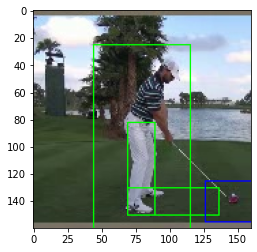

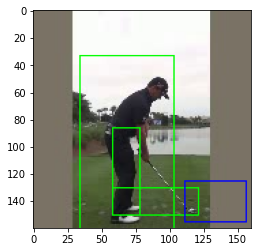

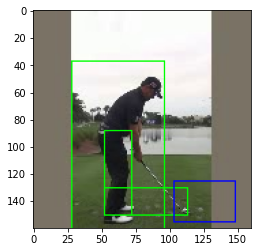

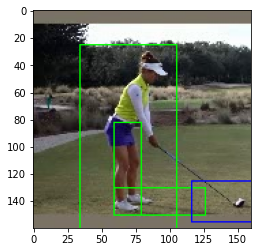

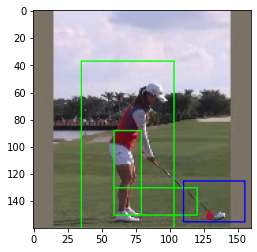

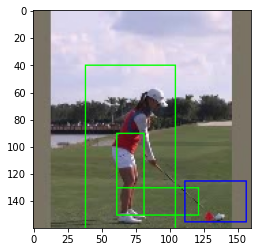

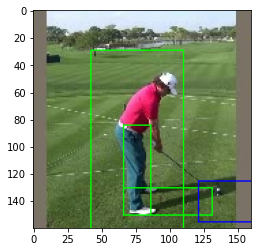

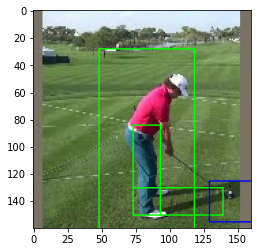

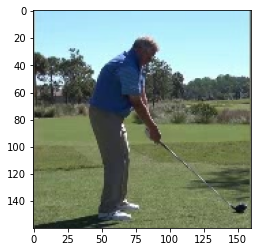

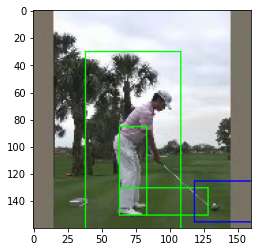

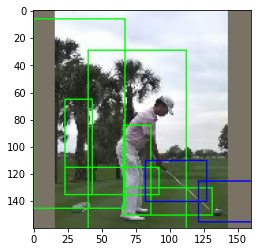

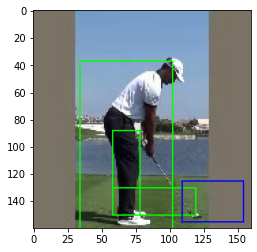

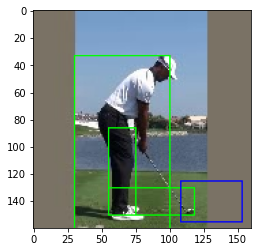

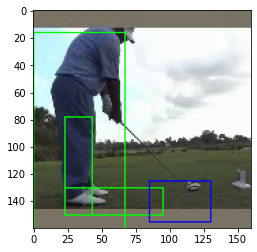

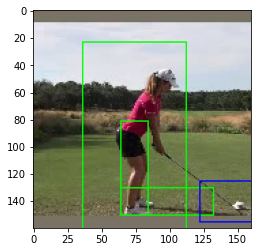

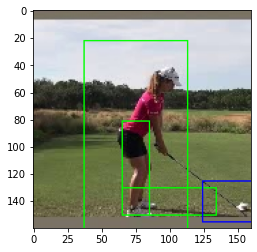

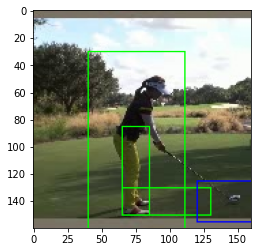

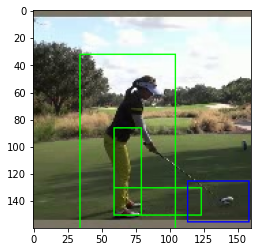

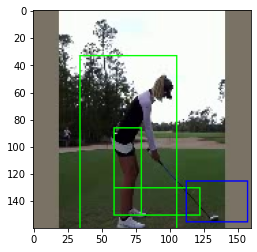

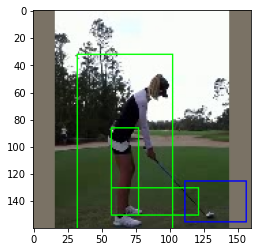

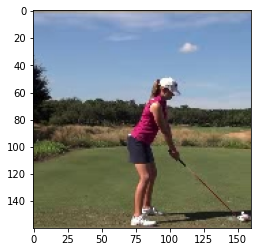

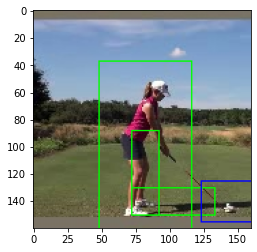

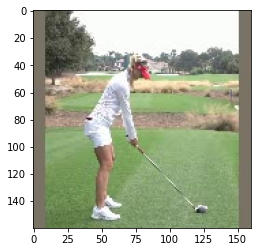

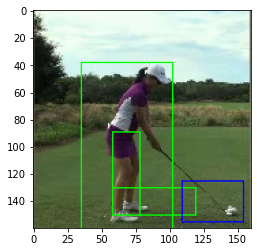

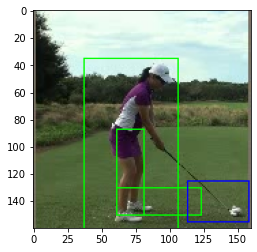

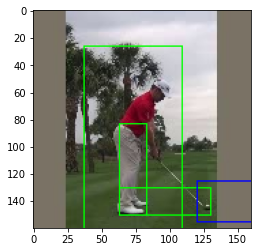

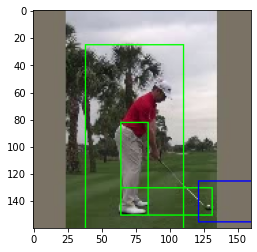

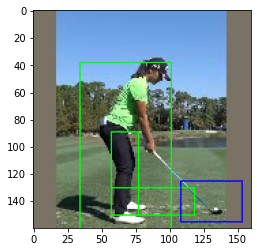

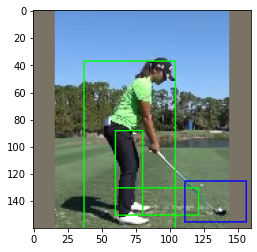

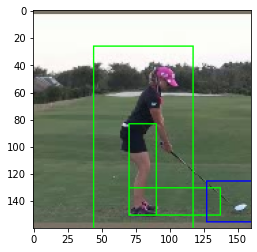

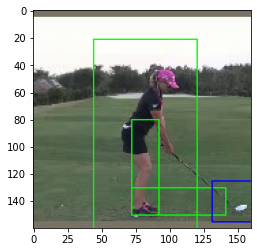

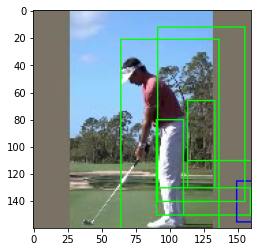

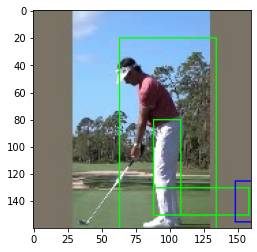

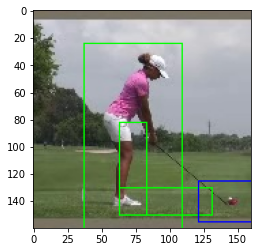

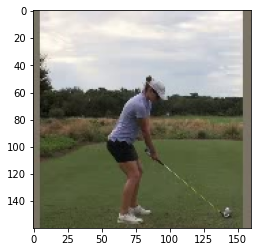

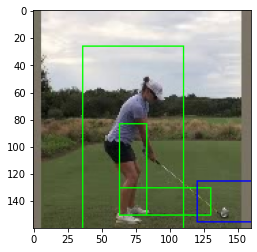

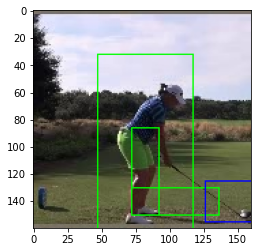

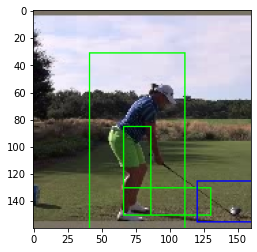

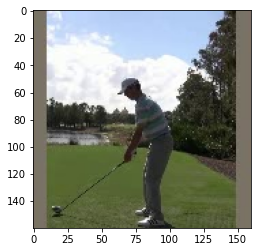

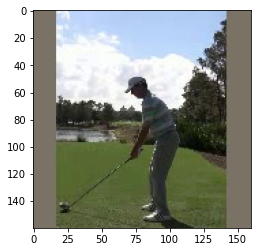

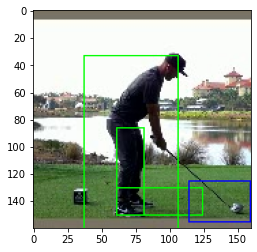

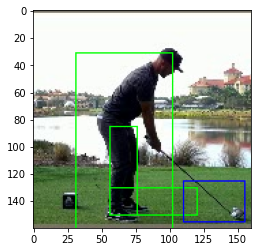

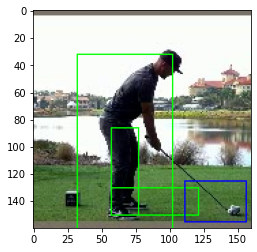

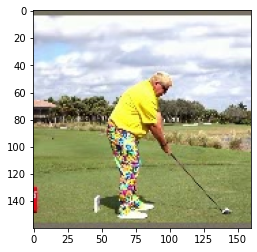

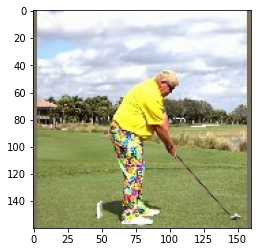

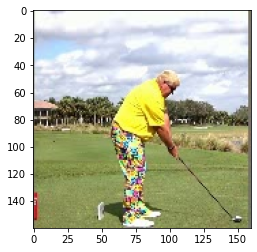

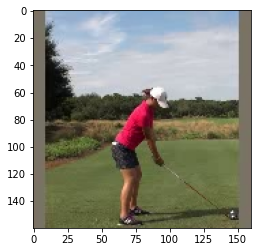

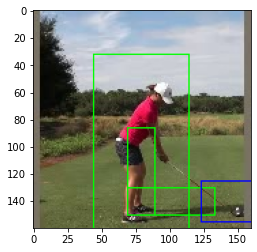

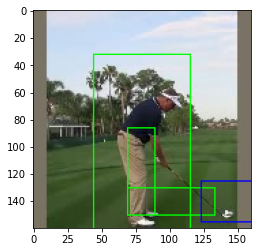

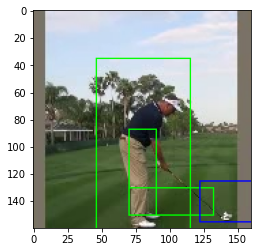

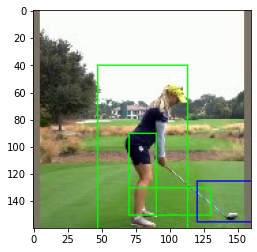

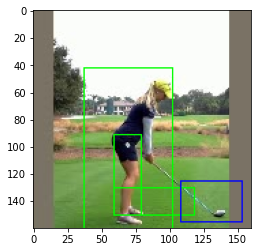

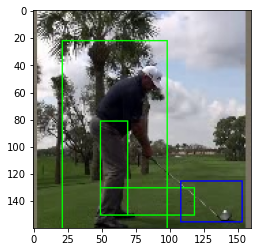

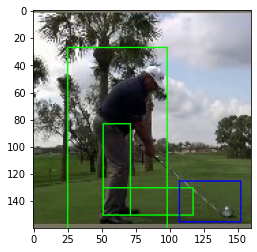

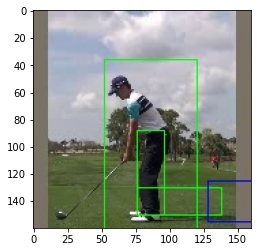

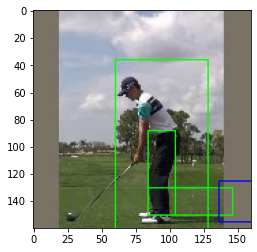

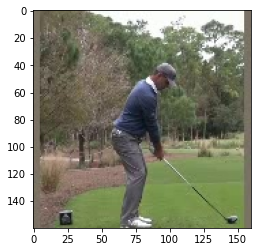

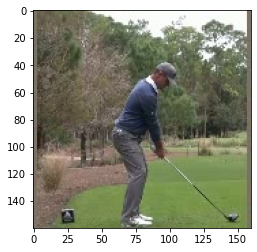

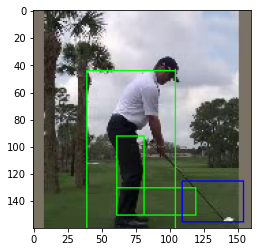

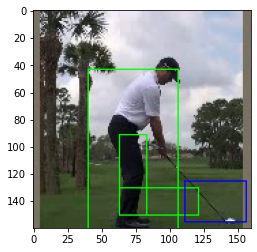

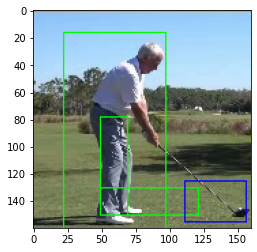

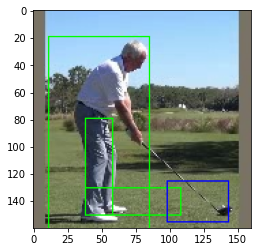

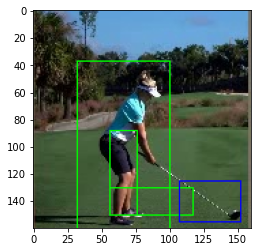

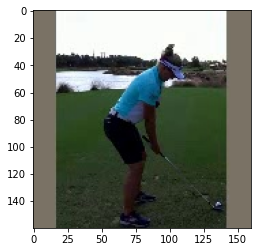

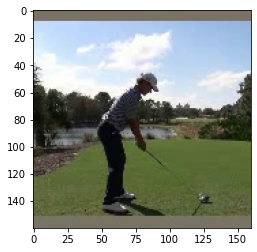

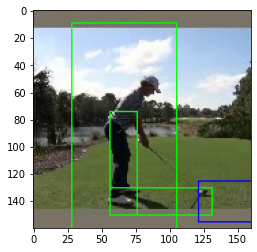

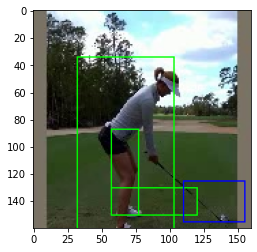

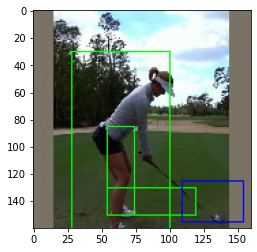

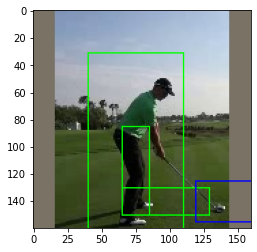

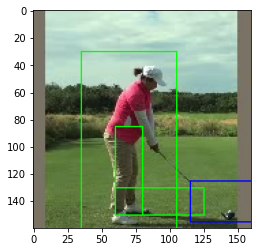

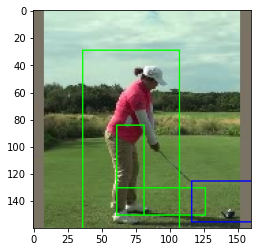

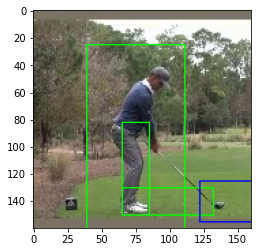

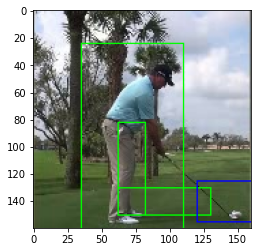

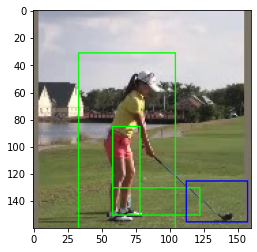

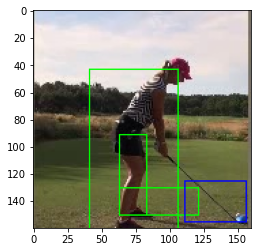

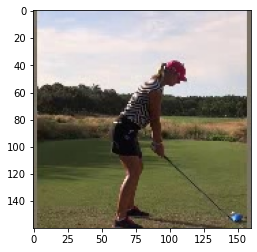

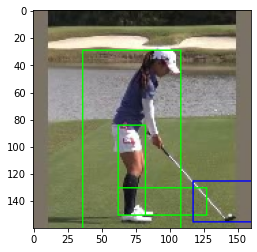

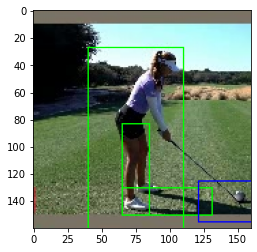

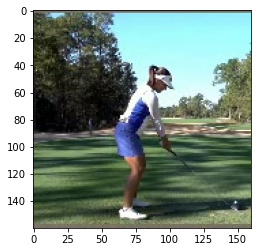

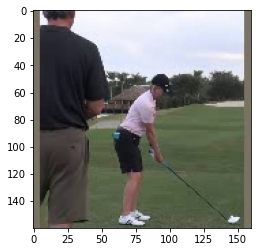

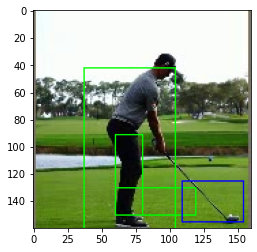

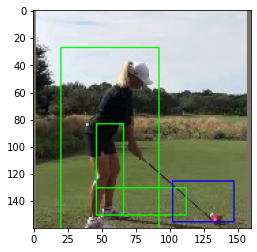

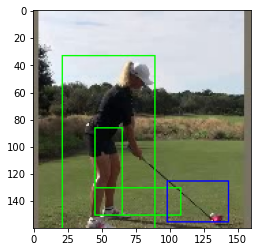

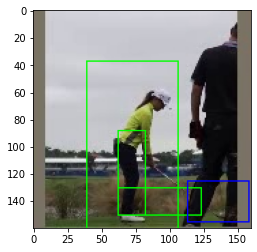

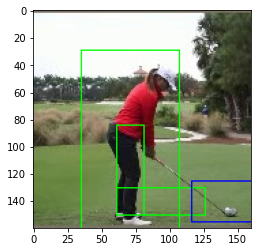

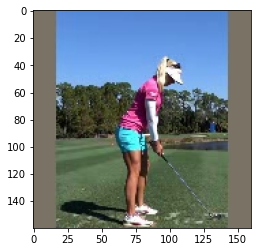

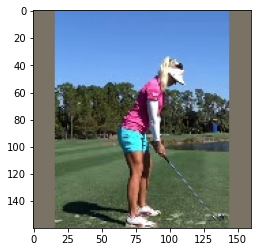

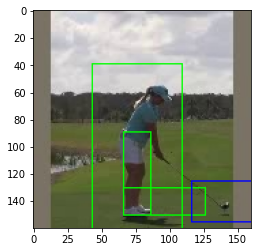

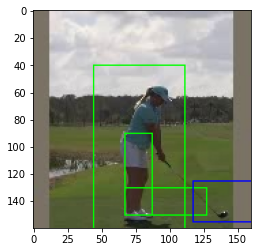

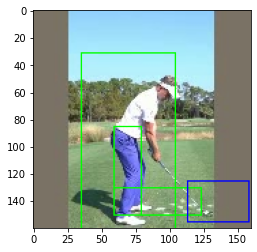

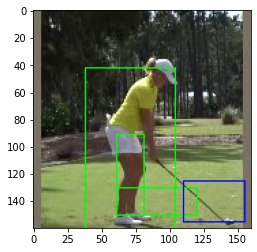

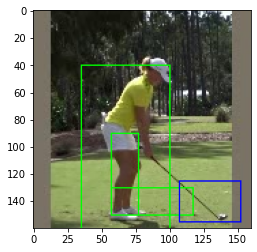

In [9]:
winStride = (2, 2)
padding = (16, 16)
meanShift = False
scale = 1.05

for i in range(100):
	image = cv2.imread(image_paths[i].as_posix())

	(rects, weights) = hog.detectMultiScale(image, winStride=winStride,padding=padding, scale=scale, useMeanshiftGrouping=meanShift)
 
	for (x, y, w, h) in rects:
		
		y+h/2
     
		cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
		cv2.rectangle(image, (x+w//2-10, y+h//2-10), (x+w//2+10, y+h-10), (0, 255, 0), 1)
		cv2.rectangle(image, (x+w//2-10, y+h-30), (x+w//2+h//2-10, y+h-10), (0, 255, 0), 1)

		cv2.rectangle(image, (x+w//2+h//2-20,y+h-35), (x+w//2+h//2+25, y+h-5), (255, 0, 0), 1)
  

	plt.imshow(cv2. cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
	# plt.axis(False)
	plt.show()